In [1]:
#Preprocessing
import pandas as pd
import numpy as np
import string
import re
import spacy
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Model Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection

import time

import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read Training Dataset 

In [2]:
train=pd.read_csv("train.csv",encoding="unicode_escape")
print("Initial :")

print('Train')
print('------------------')
print(train.head())


Initial :
Train
------------------
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan    

### Attribute Selection

In [3]:
print('Attribute Selection :')
print('\nTrain')
print('------------------')
train=train[['text','sentiment']]

print(train.head())



Attribute Selection :

Train
------------------
                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


### Drop rows with null values 

In [4]:
train.isnull().sum()
train=train.dropna(axis=0)


### Convert to lowercase 

In [5]:
print('Lowercase')
print('\nTrain')
print('------------------')
train['text']=train['text'].str.lower()
print(train['text'].head())


Lowercase

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove URL

In [6]:
print('Remove URL')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print("Remove URL: ")
print(train['text'].head())


Remove URL

Train
------------------
Remove URL: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove Emoji 

In [7]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

print('Remove Emoji')
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: remove_emojis(text))
print(train['text'].head())


Remove Emoji

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove @user 

In [8]:
print('Remove @ User')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(train['text'].head())


Remove @ User

Train
------------------
Remove @user: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove # keyword 

In [9]:
print('Remove #')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(train['text'].head())



Remove #

Train
------------------
Remove #keyword: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove numerical characters 

In [10]:
print('Remove numerical characters')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('[0-9]+', '', regex = True)
print(train['text'].head())


Remove numerical characters

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### Remove punctuation 

In [11]:
print('Remove punctuation')
print('\nTrain')
print('------------------')
train['text'] = train['text'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(train['text'].head())


Remove punctuation

Train
------------------
Remove punctuation: 
0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
Name: text, dtype: object


### Remove repeated keywords

In [12]:
print('Remove repeated keywords :')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace(r'(.)\1+', r'\1\1', regex = True)
print(train['text'].head())


Remove repeated keywords :

Train
------------------
0                    id have responded if i were going
1            soo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
Name: text, dtype: object


###  Remove Stopwords 

In [13]:
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

print("Remove stopwords: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: cleaning_stopwords(text))
print(train['text'].head())


Remove stopwords: 

Train
------------------
0                          id responded going
1                      soo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: text, dtype: object


### Tokenization

In [14]:
print("Tokenization: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(train['text'].head())


Tokenization: 

Train
------------------
Tokenization: 
0                             [id, responded, going]
1                       [soo, sad, miss, san, diego]
2                                   [boss, bullying]
3                          [interview, leave, alone]
4    [sons, couldnt, put, releases, already, bought]
Name: text, dtype: object


In [15]:
print('\nTrain')
print('------------------')
print(train.head())



Train
------------------
                                              text sentiment
0                           [id, responded, going]   neutral
1                     [soo, sad, miss, san, diego]  negative
2                                 [boss, bullying]  negative
3                        [interview, leave, alone]  negative
4  [sons, couldnt, put, releases, already, bought]  negative


### Label Encoding 

In [16]:
train['sentiment'] = train['sentiment'].map({"positive": 1, "neutral": 0, "negative": -1})
print('\nTrain')
print('------------------')
print(train.head())



Train
------------------
                                              text  sentiment
0                           [id, responded, going]          0
1                     [soo, sad, miss, san, diego]         -1
2                                 [boss, bullying]         -1
3                        [interview, leave, alone]         -1
4  [sons, couldnt, put, releases, already, bought]         -1


In [17]:
print('\nTrain')
print('------------------')
print(train['sentiment'].value_counts())



Train
------------------
 0    11117
 1     8582
-1     7781
Name: sentiment, dtype: int64


### POS 

In [18]:
print("POS : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.pos_tag)
print("POS tagging: ")
print(train['text'].head())


POS : 

Train
------------------
POS tagging: 
0           [(id, NN), (responded, VBD), (going, VBG)]
1    [(soo, JJ), (sad, JJ), (miss, NN), (san, NN), ...
2                        [(boss, IN), (bullying, VBG)]
3         [(interview, NN), (leave, VBP), (alone, RB)]
4    [(sons, NNS), (couldnt, VBP), (put, VBN), (rel...
Name: text, dtype: object


### Lemmatization

In [19]:
def get_wordnet_pos(treebank_pos):
    if treebank_pos.startswith('J'):
        return wordnet.ADJ
    elif treebank_pos.startswith('V'):
        return wordnet.VERB
    elif treebank_pos.startswith('N'):
        return wordnet.NOUN
    elif treebank_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(text):
    lemmatized_tokens = []

    for i in range(len(text)):
        word, pos = text[i]
        
        lemmatized_tokens.append(nltk.WordNetLemmatizer().lemmatize(word, get_wordnet_pos(pos)))
        
    return " ".join(lemmatized_tokens)

print("Lemmatization : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: lemmatization(text))
print(train['text'].head())


Lemmatization : 

Train
------------------
0                          id respond go
1                 soo sad miss san diego
2                              bos bully
3                  interview leave alone
4    son couldnt put release already buy
Name: text, dtype: object


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X=train['text']
y=train['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000)
X_train = tfidf_vectorizer.fit_transform(X_train) #Tokenize and build vocabulary
X_test = tfidf_vectorizer.transform(X_test) #Tokenize and build vocabulary

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21984, 1000)
(21984,)
(5496, 1000)
(5496,)


## Individual Model 

#### Confusion Matrix 

In [23]:
def confusion_matrix_evaluation(classifier,y_predicted):
    mat=confusion_matrix(y_test,y_predicted)
    sns.heatmap(mat.T, xticklabels=['Predicted 1','Predicted 0','Predicted -1'],yticklabels=['Actual 1','Actual 0','Actual -1'],
                annot=True, fmt='d', cbar=False,cmap="YlGnBu")
    plt.title('Confusion Matrix for '+classifier)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusion_matrix.png")
    plt.show()
    print(classifier+' Classification Report ')
    print('======================================================')
    print(classification_report(y_test,y_predicted))

### Individual Models

			 Decision Tree



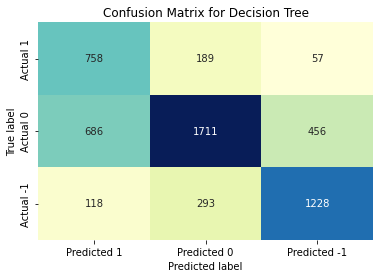

Decision Tree Classification Report 
              precision    recall  f1-score   support

          -1       0.75      0.49      0.59      1562
           0       0.60      0.78      0.68      2193
           1       0.75      0.71      0.73      1741

    accuracy                           0.67      5496
   macro avg       0.70      0.66      0.67      5496
weighted avg       0.69      0.67      0.67      5496

Training Accuracy : 0.6756       ||  0.67 seconds
			 SVC



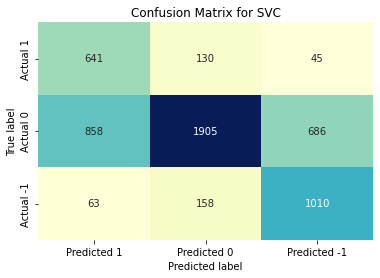

SVC Classification Report 
              precision    recall  f1-score   support

          -1       0.79      0.41      0.54      1562
           0       0.55      0.87      0.68      2193
           1       0.82      0.58      0.68      1741

    accuracy                           0.65      5496
   macro avg       0.72      0.62      0.63      5496
weighted avg       0.70      0.65      0.64      5496

Training Accuracy : 0.6579       ||  40.07 seconds
			 Logistic Regression



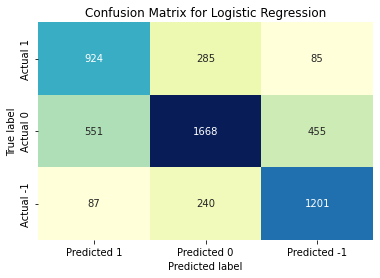

Logistic Regression Classification Report 
              precision    recall  f1-score   support

          -1       0.71      0.59      0.65      1562
           0       0.62      0.76      0.69      2193
           1       0.79      0.69      0.73      1741

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496

Training Accuracy : 0.7223       ||  0.22 seconds
			 Multinomail Naive Bayes



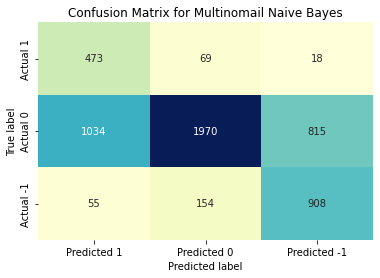

Multinomail Naive Bayes Classification Report 
              precision    recall  f1-score   support

          -1       0.84      0.30      0.45      1562
           0       0.52      0.90      0.66      2193
           1       0.81      0.52      0.64      1741

    accuracy                           0.61      5496
   macro avg       0.72      0.57      0.58      5496
weighted avg       0.70      0.61      0.59      5496

Training Accuracy : 0.6250       ||  0.01 seconds
			 KNN



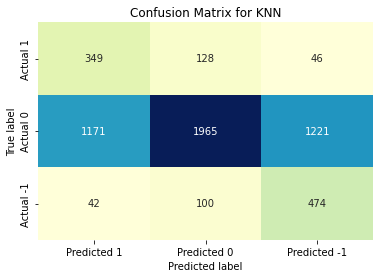

KNN Classification Report 
              precision    recall  f1-score   support

          -1       0.67      0.22      0.33      1562
           0       0.45      0.90      0.60      2193
           1       0.77      0.27      0.40      1741

    accuracy                           0.51      5496
   macro avg       0.63      0.46      0.45      5496
weighted avg       0.61      0.51      0.46      5496

Training Accuracy : 0.5451       ||  0.00 seconds
			 Random Forest



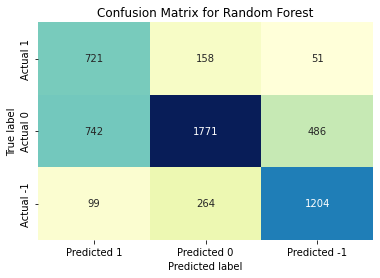

Random Forest Classification Report 
              precision    recall  f1-score   support

          -1       0.78      0.46      0.58      1562
           0       0.59      0.81      0.68      2193
           1       0.77      0.69      0.73      1741

    accuracy                           0.67      5496
   macro avg       0.71      0.65      0.66      5496
weighted avg       0.70      0.67      0.67      5496

Training Accuracy : 0.6787     ||  2.32 seconds


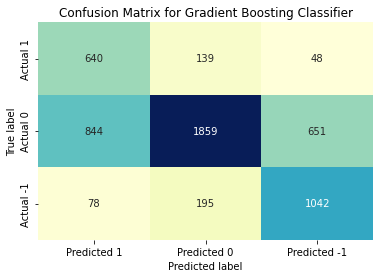

Gradient Boosting Classifier Classification Report 
              precision    recall  f1-score   support

          -1       0.77      0.41      0.54      1562
           0       0.55      0.85      0.67      2193
           1       0.79      0.60      0.68      1741

    accuracy                           0.64      5496
   macro avg       0.71      0.62      0.63      5496
weighted avg       0.69      0.64      0.64      5496

Training Accuracy : 0.6618       ||  14.04 seconds


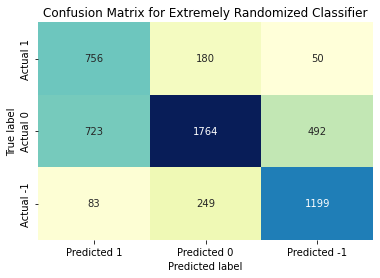

Extremely Randomized Classifier Classification Report 
              precision    recall  f1-score   support

          -1       0.77      0.48      0.59      1562
           0       0.59      0.80      0.68      2193
           1       0.78      0.69      0.73      1741

    accuracy                           0.68      5496
   macro avg       0.71      0.66      0.67      5496
weighted avg       0.70      0.68      0.67      5496

Training Accuracy : 0.6853       ||  2.57 seconds


In [24]:
modelDT = DecisionTreeClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
start_time = time.time()
modelDT.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_DT=modelDT.predict(X_test)
score_DT=accuracy_score(predicted_DT,y_test)
print('\t\t\t Decision Tree')
print('================================================================\n')
confusion_matrix_evaluation('Decision Tree',predicted_DT)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelDT.score(X_train, y_train),run_time))


modelSVC = SVC(C=0.1,kernel='linear',random_state=1)
start_time = time.time()
modelSVC.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_SVC=modelSVC.predict(X_test)

print('\t\t\t SVC')
print('================================================================\n')
confusion_matrix_evaluation('SVC',predicted_SVC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelSVC.score(X_train, y_train),run_time))


modelLR = LogisticRegression(multi_class='multinomial',random_state=1,solver='saga')
start_time = time.time()
modelLR.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_LR=modelLR.predict(X_test)
score_LR=accuracy_score(predicted_LR,y_test)


print('\t\t\t Logistic Regression')
print('================================================================\n')
confusion_matrix_evaluation('Logistic Regression',predicted_LR)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelLR.score(X_train, y_train),run_time))


modelMNB=MultinomialNB(alpha=20)
start_time = time.time()
modelMNB.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_MNB=modelMNB.predict(X_test)
score_MNB=accuracy_score(predicted_MNB,y_test)


print('\t\t\t Multinomail Naive Bayes')
print('================================================================\n')
confusion_matrix_evaluation('Multinomail Naive Bayes',predicted_MNB)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelMNB.score(X_train, y_train),run_time))


modelKNN = KNeighborsClassifier(n_neighbors=13)
start_time = time.time()
modelKNN.fit(X_train, y_train)
run_time = time.time() - start_time
predictedKNN=modelKNN.predict(X_test)
score_KNN=accuracy_score(predictedKNN,y_test)


print('\t\t\t KNN')
print('================================================================\n')
confusion_matrix_evaluation('KNN',predictedKNN)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelKNN.score(X_train, y_train),run_time))

modelRF = RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
start_time = time.time()
modelRF.fit(X_train, y_train)
run_time = time.time() - start_time
predictedRF=modelRF.predict(X_test)
score_RF=accuracy_score(predictedRF,y_test)


print('\t\t\t Random Forest')
print('================================================================\n')
confusion_matrix_evaluation('Random Forest',predictedRF)
print('Training Accuracy : %.4f     ||  %4.2f seconds' % (modelRF.score(X_train, y_train),run_time))


modelGBC = GradientBoostingClassifier(random_state=1,max_depth=3,max_leaf_nodes=40)
start_time = time.time()
modelGBC.fit(X_train, y_train)
predictedGBC = modelGBC.predict(X_test)
run_time = time.time() - start_time
confusion_matrix_evaluation('Gradient Boosting Classifier',predictedGBC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelGBC.score(X_train, y_train),run_time))


modelETC = ExtraTreesClassifier(random_state=1,max_depth=80,max_leaf_nodes=100)
start_time = time.time()
modelETC.fit(X_train, y_train)
predictedETC = modelETC.predict(X_test)
run_time = time.time() - start_time
confusion_matrix_evaluation('Extremely Randomized Classifier',predictedETC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelETC.score(X_train, y_train),run_time))